In [1]:
#acs-trigger-rate

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline


In [68]:
import re


log_lines = []

for l in open("/home/savchenk/work/integral/ibas/ibas-cgi-bin/offline/var/log/ibas_acsmonitor_log.txt"):
    if re.match(".*? +2021-.*?", l):
        log_lines.append(l)
        
        
recent_log = "\n".join(log_lines)
        

In [23]:
import time
import numpy as np

In [88]:
events=[]

for l in recent_log.split("\n"):
    for n, rex in [
        (
            '0 - pre-detection',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: The best burst is:  OBT=(?P<obt>.*?)  s=(?P<sigma>.*?)  bgrd=(?P<background>[0-9\.]*)'
        ),
        (
            '1 - background-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]+?) is out of range <5400.0 : 7500.0>'
        ),
        (
            '2 - background-in-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]*?) is in acceptable range <(?P<backgroundl1>[0-9\.]*?) : (?P<backgroundl2>[0-9\.]*?)>'
        ),
        (
            '3 - sc-distance-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: S/C distance (?P<scdistance>[0-9\.]*?) is out of range <(?P<scdistancel1>[0-9\.]*?) : (?P<scdistancel2>[0-9\.]*?)>'
        ),
        (
            '9 - distributed-detection',
            '^.*? +(?P<date>20.*?) .*?LC/EPH: OBT=(.*?) past=(.*?) future=(.*?) delay=(.*?) fname=.*?'
        )
    ]:
        r = re.search(rex, l)
        if r:
            R = r.groupdict()
            print(n, R)
            events.append(
                {**R,
                **dict(
                    event=n,
                    date=R['date'],
                    time_s=time.mktime(time.strptime(R['date'], "%Y-%m-%dT%H:%M:%S"))
                )}
            )

0 - pre-detection {'date': '2021-01-05T09:01:54', 'obt': '43971323.543', 'sigma': '6.009', 'background': '6664.4'}
2 - background-in-range {'date': '2021-01-05T09:01:54', 'background': '6664.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-05T09:01:54', 'scdistance': '76239.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-05T09:04:50', 'obt': '43971473.743', 'sigma': '7.505', 'background': '6683.6'}
2 - background-in-range {'date': '2021-01-05T09:04:50', 'background': '6683.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-05T09:04:50', 'scdistance': '75921.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-05T09:38:10', 'obt': '43973491.593', 'sigma': '9.173', 'background': '6754.5'}
2 - background-in-range {'date': '2021-01-05T09:38:10', 'background': '6754.5', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-01-08T01:29:06', 'obt': '44203327.093', 'sigma': '24.645', 'background': '10757.2'}
1 - background-out-of-range {'date': '2021-01-08T01:29:06', 'background': '10757.2'}
0 - pre-detection {'date': '2021-01-08T01:31:14', 'obt': '44203472.693', 'sigma': '6.769', 'background': '10762.5'}
1 - background-out-of-range {'date': '2021-01-08T01:31:14', 'background': '10762.5'}
0 - pre-detection {'date': '2021-01-08T01:31:30', 'obt': '44203482.643', 'sigma': '9.224', 'background': '10713.3'}
1 - background-out-of-range {'date': '2021-01-08T01:31:30', 'background': '10713.3'}
0 - pre-detection {'date': '2021-01-08T01:35:22', 'obt': '44203708.443', 'sigma': '6.352', 'background': '11550.7'}
1 - background-out-of-range {'date': '2021-01-08T01:35:22', 'background': '11550.7'}
0 - pre-detection {'date': '2021-01-08T01:41:21', 'obt': '44204068.243', 'sigma': '6.197', 'background': '11542.0'}
1 - background-out-of-range {'date': '2021-01-08T01:41:21', 'background': '1154

0 - pre-detection {'date': '2021-01-13T09:05:22', 'obt': '44662738.143', 'sigma': '6.040', 'background': '6510.8'}
2 - background-in-range {'date': '2021-01-13T09:05:22', 'background': '6510.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-13T09:05:22', 'scdistance': '71843.0', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-13T09:07:06', 'obt': '44662826.793', 'sigma': '12.863', 'background': '6521.5'}
2 - background-in-range {'date': '2021-01-13T09:07:06', 'background': '6521.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-13T09:07:06', 'scdistance': '71645.4', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-13T09:07:46', 'obt': '44662851.993', 'sigma': '35.698', 'background': '6607.1'}
2 - background-in-range {'date': '2021-01-13T09:07:46', 'background': '6607.1', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-02-08T22:26:05', 'obt': '46957175.393', 'sigma': '9.759', 'background': '6536.8'}
2 - background-in-range {'date': '2021-02-08T22:26:05', 'background': '6536.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T22:26:05', 'scdistance': '80654.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T22:27:48', 'obt': '46957282.793', 'sigma': '9.534', 'background': '6605.1'}
2 - background-in-range {'date': '2021-02-08T22:27:48', 'background': '6605.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T22:27:48', 'scdistance': '80438.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T22:28:20', 'obt': '46957288.893', 'sigma': '22.003', 'background': '6580.2'}
2 - background-in-range {'date': '2021-02-08T22:28:20', 'background': '6580.2', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-09T00:07:40', 'obt': '46963277.693', 'sigma': '9.146', 'background': '14156.6'}
1 - background-out-of-range {'date': '2021-02-09T00:07:40', 'background': '14156.6'}
0 - pre-detection {'date': '2021-02-09T00:10:36', 'obt': '46963423.243', 'sigma': '9.550', 'background': '14077.3'}
1 - background-out-of-range {'date': '2021-02-09T00:10:36', 'background': '14077.3'}
0 - pre-detection {'date': '2021-02-09T00:12:27', 'obt': '46963544.193', 'sigma': '6.075', 'background': '14596.5'}
1 - background-out-of-range {'date': '2021-02-09T00:12:27', 'background': '14596.5'}
0 - pre-detection {'date': '2021-02-09T00:13:56', 'obt': '46963652.843', 'sigma': '9.188', 'background': '14504.1'}
1 - background-out-of-range {'date': '2021-02-09T00:13:56', 'background': '14504.1'}
0 - pre-detection {'date': '2021-02-09T00:14:52', 'obt': '46963677.543', 'sigma': '10.949', 'background': '14448.5'}
1 - background-out-of-range {'date': '2021-02-09T00:14:52', 'background': '1444

0 - pre-detection {'date': '2021-02-14T06:43:08', 'obt': '47418979.693', 'sigma': '9.074', 'background': '7157.9'}
2 - background-in-range {'date': '2021-02-14T06:43:08', 'background': '7157.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T06:43:08', 'scdistance': '76647.7', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T06:46:15', 'obt': '47419190.543', 'sigma': '9.162', 'background': '7337.4'}
2 - background-in-range {'date': '2021-02-14T06:46:15', 'background': '7337.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T06:46:15', 'scdistance': '76202.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T06:47:08', 'obt': '47419212.243', 'sigma': '11.492', 'background': '7479.8'}
2 - background-in-range {'date': '2021-02-14T06:47:08', 'background': '7479.8', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-16T22:45:40', 'obt': '47649521.093', 'sigma': '8.644', 'background': '6531.5'}
2 - background-in-range {'date': '2021-02-16T22:45:40', 'background': '6531.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:45:40', 'scdistance': '75437.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-16T22:55:08', 'obt': '47650110.593', 'sigma': '6.618', 'background': '6549.6'}
2 - background-in-range {'date': '2021-02-16T22:55:08', 'background': '6549.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:55:08', 'scdistance': '74167.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-19T01:23:33', 'obt': '47831842.393', 'sigma': '11.871', 'background': '6658.0'}
2 - background-in-range {'date': '2021-02-19T01:23:33', 'background': '6658.0', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-22T02:27:32', 'obt': '48094837.693', 'sigma': '6.127', 'background': '6810.2'}
2 - background-in-range {'date': '2021-02-22T02:27:32', 'background': '6810.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:27:32'}
0 - pre-detection {'date': '2021-02-22T02:32:31', 'obt': '48095141.093', 'sigma': '9.054', 'background': '6504.3'}
2 - background-in-range {'date': '2021-02-22T02:32:31', 'background': '6504.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:32:31'}
0 - pre-detection {'date': '2021-02-22T02:36:13', 'obt': '48095365.793', 'sigma': '9.280', 'background': '6722.2'}
2 - background-in-range {'date': '2021-02-22T02:36:13', 'background': '6722.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:36:13'}
0 - pre-detection {'date': '2021-02-22T02:38:29', 'obt': '48095500.693', 'sigma': '9.

0 - pre-detection {'date': '2021-02-22T04:15:24', 'obt': '48101332.193', 'sigma': '10.065', 'background': '6488.4'}
2 - background-in-range {'date': '2021-02-22T04:15:24', 'background': '6488.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:15:24', 'scdistance': '90968.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:15:24', 'obt': '48101341.093', 'sigma': '9.963', 'background': '6622.3'}
2 - background-in-range {'date': '2021-02-22T04:15:24', 'background': '6622.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:15:24', 'scdistance': '90952.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:17:01', 'obt': '48101425.843', 'sigma': '7.733', 'background': '6488.2'}
2 - background-in-range {'date': '2021-02-22T04:17:01', 'background': '6488.2', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-22T05:50:45', 'obt': '48107050.643', 'sigma': '15.870', 'background': '8923.8'}
1 - background-out-of-range {'date': '2021-02-22T05:50:45', 'background': '8923.8'}
0 - pre-detection {'date': '2021-02-22T05:52:13', 'obt': '48107139.293', 'sigma': '6.141', 'background': '7999.2'}
1 - background-out-of-range {'date': '2021-02-22T05:52:13', 'background': '7999.2'}
0 - pre-detection {'date': '2021-02-22T05:53:49', 'obt': '48107232.993', 'sigma': '9.042', 'background': '7925.0'}
1 - background-out-of-range {'date': '2021-02-22T05:53:49', 'background': '7925.0'}
0 - pre-detection {'date': '2021-02-22T05:59:17', 'obt': '48107551.893', 'sigma': '6.168', 'background': '7136.6'}
2 - background-in-range {'date': '2021-02-22T05:59:17', 'background': '7136.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T05:59:17', 'scdistance': '79173.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detecti

In [71]:
import numpy as np

In [72]:
t0 = time.strptime("2021-02-22T00:00:00", "%Y-%m-%dT%H:%M:%S")
t0_s = time.mktime(t0)

0 - pre-detection 151
since 1.3 days max of 28.0 per 3600 at 0.148
1 - background-out-of-range 48
since 0.15 days max of 25.0 per 3600 at 0.219
2 - background-in-range 103
since 1.3 days max of 27.0 per 3600 at 0.142
3 - sc-distance-out-of-range 76
since 0.2 days max of 28.0 per 3600 at 0.117
9 - distributed-detection 27
since 1.1 days max of 17.0 per 3600 at 0.0671


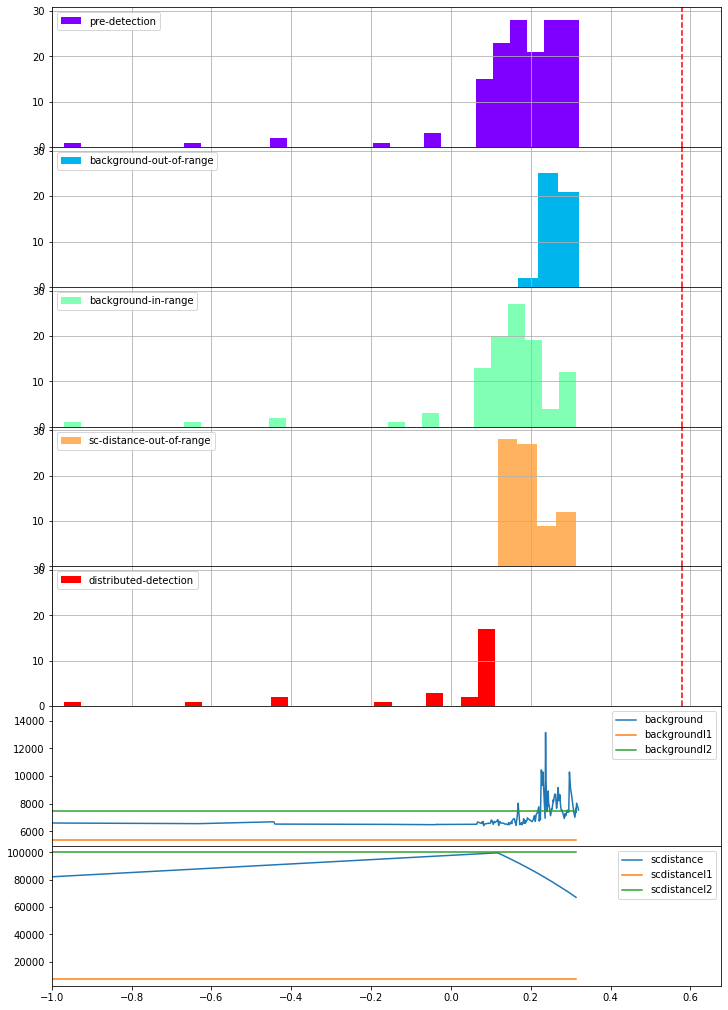

In [97]:
t1 = time.strptime("2021-02-21T00:00:00", "%Y-%m-%dT%H:%M:%S")
t1_s = time.mktime(t1)

from matplotlib.pyplot import cm
cm.rainbow

all_kinds = sorted(set([ e['event'] for e in events ]))
colors = cm.rainbow(np.linspace(0,1,len(all_kinds)))

f, axes = plt.subplots(len(all_kinds) + 2,1, figsize=(12,18), sharex=True)

ymax = 0

for i_kind, (event_kind, ax, color) in enumerate(zip(all_kinds, axes, colors)):    
    _events = [e for e in events if e['event'] == event_kind and e['time_s'] > t1_s]
    print(event_kind, len(_events))
    
    t = np.array([e['time_s'] for e in _events])
    
    tbin_s = 3600
    
    h = ax.hist(        
        (t-t0_s)/24./3600.,
#        [i_kind for e in _events],
        label=event_kind.split()[-1],
        bins=int((t.max()-t.min())/tbin_s),
        color=color,
    )
    
    i_max = h[0].argmax()
    print(f"since {(t.max() - t.min())/24/3600:.2g} days max of {h[0][i_max]} per {tbin_s} at {h[1][i_max]:.3g}")
    tbin_s
    
    if h[0].max() > ymax:
        ymax = h[0].max()
    
    ax.set_ylim([0,400])
    
    ax.legend(loc=2)
    
    ax.grid(True)
    
    ax.axvline((time.time() -t0_s)/24./3600., c='r', ls='--')
    
    
    #print(np.array([e['background'] for e in _events if 'background' in e]))
    

def plot_c(ax, c, **kwargs):
    t = np.array([e['time_s'] for e in events  if c in e])
    ax.plot(
        (t-t0_s)/24./3600,
        np.array([float(e[c]) for e in events if c in e]),        
        label=c,
        **kwargs
    )
    ax.legend()

plot_c(axes[-2], 'background')
plot_c(axes[-2], 'backgroundl1')
plot_c(axes[-2], 'backgroundl2')

plot_c(axes[-1], 'scdistance')
plot_c(axes[-1], 'scdistancel1')
plot_c(axes[-1], 'scdistancel2')


plt.subplots_adjust(hspace=0)

for ax in axes[:-2]:    
    ax.set_ylim([0, ymax*1.1])

#plt.xlabel(f"days before {time.strftime('%Y-%d-%m %H:%M:%S', t0)}")

plt.xlim([-100, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.savefig("incident-long-history.png")

plt.xlim([-15, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.xlim([-1, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.savefig("incident-log.png")


In [84]:
np.array([float(e['scdistance']) for e in events if 'scdistance' in e])

array([76239.3, 75921.5, 71529.6, 71516. , 91703.1, 86120.4, 85914.9,
       84818.7, 84811.8, 84533.5, 84175. , 83850.4, 83563.8, 83513.6,
       82747.8, 81787.6, 81365.6, 81038.8, 80402.5, 80395.8, 79958.2,
       79921.7, 79429.5, 77905.1, 80142.5, 85908.1, 78581.5, 77187. ,
       77138.8, 76920.1, 76239.7, 76232.3, 76031.1, 76009. , 75725.7,
       75036.5, 75025.3, 74688.4, 74128.8, 73915.7, 73853.5, 71843. ,
       71645.4, 71589.1, 70975.3, 70689. , 70474. , 70442.2, 69908.6,
       69897.7, 68868.5, 68493.4, 66670.1, 65474.9, 85346.2, 84344.7,
       84196.2, 83453.4, 82204.8, 82202.2, 82011.3, 81951. , 81531.1,
       80923.8, 80863.4, 80654.2, 80438.8, 80426.6, 80013. , 79773. ,
       79719.3, 79478.9, 79054.9, 78767.4, 78745.7, 78704.7, 78467.4,
       78456.3, 79156.9, 98482. , 95806.4, 94874.2, 93802. , 89919.4,
       89559.5, 86328. , 84801.3, 82013.7, 81582.8, 81378.2, 81332.9,
       81025. , 80685.2, 80187.3, 79815.5, 79769.6, 79479.1, 78611.8,
       78315.6, 7756

# Conclusion

this was the most impactful radiation belt background variation, the most triggers at least since 2 years.

this exact sort of trigger excess has regular background but was near belt edge. It could be mitigated by changing belt limit, if it continues to be problematic.

